In [21]:
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Float, Integer, String, Date
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import sqlite3 as db

%matplotlib inline

In [22]:
#Establish path to the CSV file that was created from the cleaning dataframe
unemp_data_path = "data sets/AdvStateUnempFundsTitleXII_edited.csv"

In [23]:
pd.options.display.float_format = '{:.2f}'.format

In [24]:
#Create a dataframe from the CSV file
unemp_data = pd.read_csv(unemp_data_path)

unemp = pd.DataFrame(unemp_data)

# del unemp_df['Unnamed: 0']

unemp

,Record Date,State Name,Interest Rate Percent,Outstanding Advance Balance,Advance Authorization Current Month,Gross Advance Draws Current Month,Interest Accrued Fiscal Year to Date,Interest Paid Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,9/9/2021,California,2.28,19422557619.00,1300000000,0.00,3636060.10,0,1,2021,4,2021,3,9,9
1,9/9/2021,Colorado,2.28,1014167919.00,500000000,0.00,189860.46,0,2,2021,4,2021,3,9,9
2,9/9/2021,Connecticut,2.28,725070962.70,0,0.00,135739.18,0,3,2021,4,2021,3,9,9
3,9/9/2021,Illinois,2.28,4232873381.00,0,0.00,792428.22,0,5,2021,4,2021,3,9,9
4,9/9/2021,Massachusetts,2.28,2268015460.00,0,0.00,424590.88,0,6,2021,4,2021,3,9,9
5,9/9/2021,Minnesota,2.28,1088672001.00,150000000,27812530.42,201933.41,0,7,2021,4,2021,3,9,9
6,9/9/2021,New Jersey,2.28,226821610.20,300000000,59332000.00,39279.90,0,9,2021,4,2021,3,9,9
7,9/9/2021,New York,2.28,8954452602.00,500000000,52472096.33,1672442.46,0,10,2021,4,2021,3,9,9
8,9/9/2021,Pennsylvania,2.28,738076135.60,300000000,17977271.14,136504.29,0,11,2021,4,2021,3,9,9
9,9/9/2021,Texas,2.28,6021946531.00,220000000,26522337.57,1124161.03,0,12,2021,4,2021,3,9,9


In [25]:
# create dataframe to groupby state and year
unemp_df = pd.DataFrame(unemp[['Record Date', 'State Name', 'Outstanding Advance Balance', 'Interest Accrued Fiscal Year to Date', 'Calendar Year']])

unemp_df.head(50)

,Record Date,State Name,Outstanding Advance Balance,Interest Accrued Fiscal Year to Date,Calendar Year
0,9/9/2021,California,19422557619.00,3636060.10,2021
1,9/9/2021,Colorado,1014167919.00,189860.46,2021
2,9/9/2021,Connecticut,725070962.70,135739.18,2021
3,9/9/2021,Illinois,4232873381.00,792428.22,2021
4,9/9/2021,Massachusetts,2268015460.00,424590.88,2021
5,9/9/2021,Minnesota,1088672001.00,201933.41,2021
6,9/9/2021,New Jersey,226821610.20,39279.90,2021
7,9/9/2021,New York,8954452602.00,1672442.46,2021
8,9/9/2021,Pennsylvania,738076135.60,136504.29,2021
9,9/9/2021,Texas,6021946531.00,1124161.03,2021


In [26]:
unemp_df2 = unemp_df.groupby(["State Name", "Calendar Year"], as_index = False)['Outstanding Advance Balance'].sum()
unemp_df2.drop(unemp_df2[unemp_df2['Calendar Year'] <= 2018].index, inplace=True)
unemp_df2.rename(columns = {'Calendar Year': 'Year', 'State Name':'State', 'Outstanding Advance Balance':'Outstanding_Balance'}, inplace=True)

unemp_df2['Outstanding_Balance'] = unemp_df2['Outstanding_Balance'].div(1000000).round(2)

unemp_df2

,State,Year,Outstanding_Balance
2,California,2020,17834.64
3,California,2021,19422.56
4,Colorado,2020,749.42
5,Colorado,2021,1014.17
6,Connecticut,2020,505.98
7,Connecticut,2021,725.07
8,Hawaii,2020,691.55
9,Illinois,2020,3314.33
10,Illinois,2021,4232.87
11,Kentucky,2020,505.75


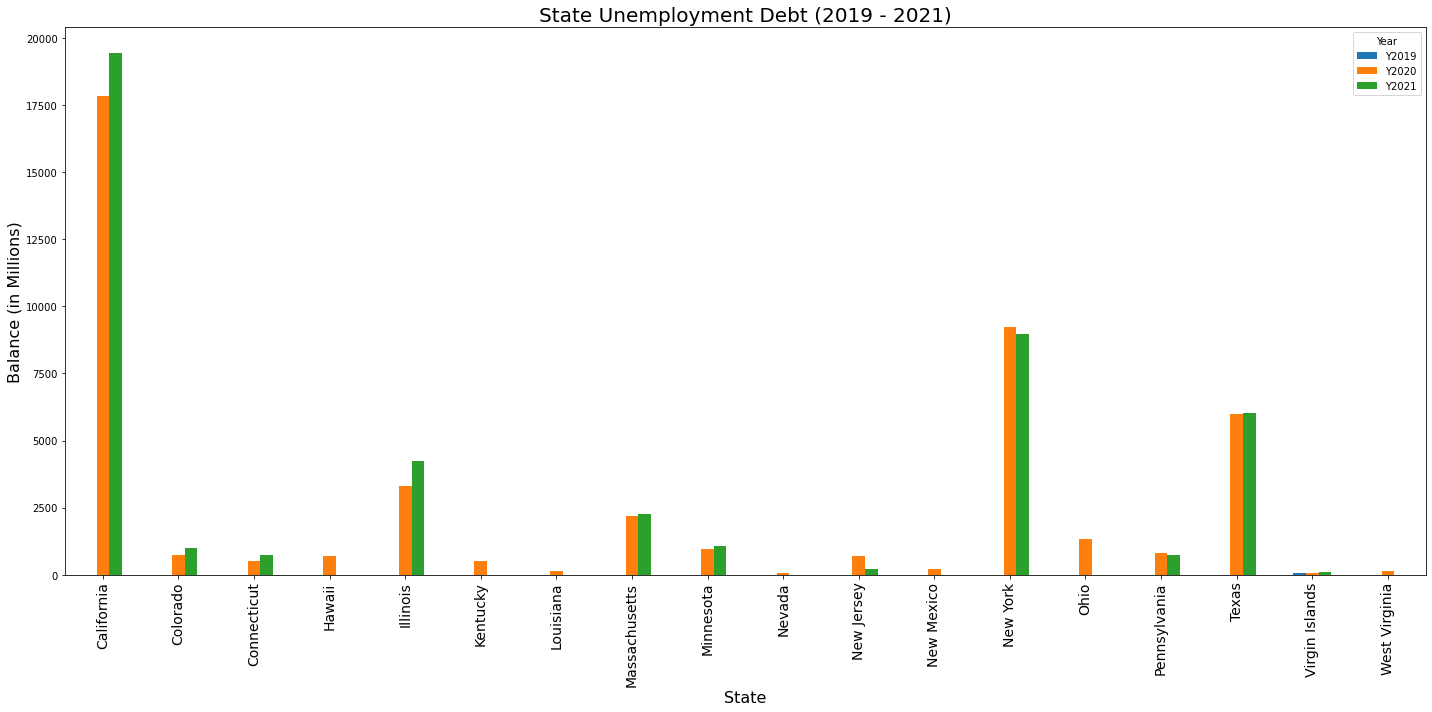

In [58]:
plot1_df = unemp_df2.pivot_table(index=['State'], columns=['Year'], values = 'Outstanding_Balance')

plot1_df.plot.bar(figsize = (20,10))
plt.title("State Unemployment Debt (2019 - 2021)", fontsize=20)
plt.xlabel("State", fontsize=16)
plt.ylabel("Balance (in Millions)", fontsize=16)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.savefig("State Debt.png")

plt.show()

In [28]:
#Establish path to the CSV file for federal agency funding
fed_agency_data_path = "data sets/USFR_StmtNetCost_2019_2020.csv"

In [29]:
#Create a dataframe from the CSV file
fed_data = pd.read_csv(fed_agency_data_path)

fed_df = pd.DataFrame(fed_data)

fed_df

,Record Date,Agency Name,Gross Cost (in Billions),Earned Revenue (in Billions),Subtotal (in Billions),Change in Assumptions (in Billions),Net Cost (in Billions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,9/30/2020,Total,7194.10,461.60,6732.50,679.50,7412.00,42,2020,4,2020,3,9,30
1,9/30/2020,Department of Health and Human Services,1537.00,130.00,1407.00,0.10,1407.10,1,2020,4,2020,3,9,30
2,9/30/2020,Social Security Administration,1157.60,0.30,1157.30,nan,1157.30,2,2020,4,2020,3,9,30
3,9/30/2020,Department of Veterans Affairs,386.30,4.00,382.30,602.70,985.00,3,2020,4,2020,3,9,30
4,9/30/2020,Department of Defense,802.20,39.80,762.40,-17.40,745.00,4,2020,4,2020,3,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,9/30/2019,General Services Administration,0.10,0.80,-0.70,nan,-0.70,38,2019,4,2019,3,9,30
80,9/30/2019,Tennessee Valley Authority,9.90,11.30,-1.40,nan,-1.40,39,2019,4,2019,3,9,30
81,9/30/2019,Federal Deposit Insurance Corporation,0.40,5.00,-4.60,nan,-4.60,40,2019,4,2019,3,9,30
82,9/30/2019,All other entities,22.00,1.80,20.20,nan,20.20,41,2019,4,2019,3,9,30


In [30]:
# Reduct fed agency spending dataframe
fedb_df = pd.DataFrame(fed_df[['Agency Name', 'Gross Cost (in Billions)', 'Calendar Year']])

fedb_df.drop(fedb_df[fedb_df['Agency Name']=='Total'].index, inplace=True)

fedb_df = fedb_df.dropna()

fedb_df

,Agency Name,Gross Cost (in Billions),Calendar Year
1,Department of Health and Human Services,1537.00,2020
2,Social Security Administration,1157.60,2020
3,Department of Veterans Affairs,386.30,2020
4,Department of Defense,802.20,2020
5,Department of the Treasury,581.30,2020
...,...,...,...
78,Export-Import Bank of the U.S,-0.10,2019
79,General Services Administration,0.10,2019
80,Tennessee Valley Authority,9.90,2019
81,Federal Deposit Insurance Corporation,0.40,2019


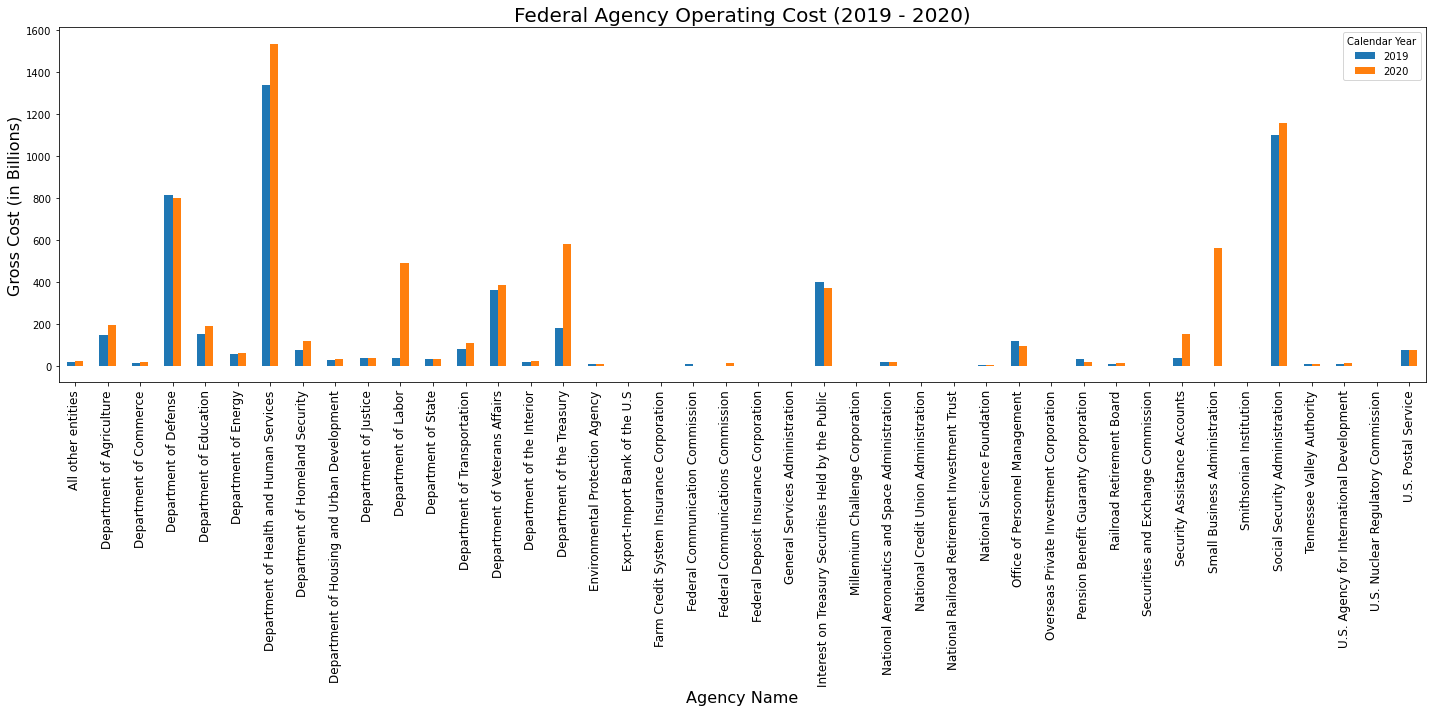

In [59]:
plot2_df = fedb_df.pivot_table(index=['Agency Name'], columns=['Calendar Year'], values = 'Gross Cost (in Billions)')

plot2_df.plot.bar(figsize = (20,10))
plt.title("Federal Agency Operating Cost (2019 - 2020)", fontsize=20)
plt.xlabel("Agency Name", fontsize=16)
plt.ylabel("Gross Cost (in Billions)", fontsize=16)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig("Agency Cost.png")

plt.show()

In [32]:
#create dataframe for populating sql.lite table
# unemp_df3 = unemp_df2.rename_axis("record_id")

# unemp_df3

In [33]:
# Create engine for establishing the new sqlite db
# ----------------------------------
# engine = create_engine(f"sqlite:///Sqlite db/Final_DB/unemployment_data.dbtest.sqlite")
# conn = engine.connect()

In [34]:
#Use engine.execute to create the table schema and set primary key
# engine.execute('CREATE TABLE "unemp_balance" ('
#                'record_id INTEGER NOT NULL PRIMARY KEY,'
#                'State VARCHAR,'
#               'Year VARCHAR,'
#               'Outstanding_Balance FLOAT);')

In [35]:
# #Load the data from the authors dataframe to the sqlite authors table
# unemp_df3.to_sql(name='unemp_balance', con=conn, if_exists='append', index=True, index_label="record_id")

In [36]:
# data = unemp_df2.to_json('./data.json', orient='index')
# print(data)

In [37]:
# data2 = fedb_df.to_json('./data2.json', orient='index')
# print(data)

In [38]:
# years = unemp_df2.columns.difference(['Year'])
# unemp_df4 = (unemp_df2.groupby('Year')[years]
#          .apply(lambda x: x.to_dict('records'))
#          .reset_index(name='Data')
#          .to_json('./data3.json', orient='records'))

# print(data)

In [39]:
unemp_df2['Year'] = unemp_df2['Year'].replace({2019:'Y2019', 2020:'Y2020', 2021:'Y2021'})

unemp_df2

,State,Year,Outstanding_Balance
2,California,Y2020,17834.64
3,California,Y2021,19422.56
4,Colorado,Y2020,749.42
5,Colorado,Y2021,1014.17
6,Connecticut,Y2020,505.98
7,Connecticut,Y2021,725.07
8,Hawaii,Y2020,691.55
9,Illinois,Y2020,3314.33
10,Illinois,Y2021,4232.87
11,Kentucky,Y2020,505.75


In [40]:
#Create pivot to plot life expectancy change over the data timeframe
unemp_df5 = unemp_df2.pivot_table(index=['Year'], columns=['State'], values = 'Outstanding_Balance')

unemp_df6 = pd.DataFrame(unemp_df5)

unemp_df6

State,California,Colorado,Connecticut,Hawaii,Illinois,Kentucky,Louisiana,Massachusetts,Minnesota,Nevada,New Jersey,New Mexico,New York,Ohio,Pennsylvania,Texas,Virgin Islands,West Virginia
Year,,,,,,,,,,,,,,,,,,
Y2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,63.28,nan
Y2020,17834.64,749.42,505.98,691.55,3314.33,505.75,133.46,2201.22,969.16,61.95,703.60,206.20,9241.38,1324.74,821.53,6002.50,85.01,132.12
Y2021,19422.56,1014.17,725.07,nan,4232.87,nan,nan,2268.02,1088.67,nan,226.82,nan,8954.45,nan,738.08,6021.95,96.72,nan


In [41]:
final_df = unemp_df6.fillna(0)

final_df

State,California,Colorado,Connecticut,Hawaii,Illinois,Kentucky,Louisiana,Massachusetts,Minnesota,Nevada,New Jersey,New Mexico,New York,Ohio,Pennsylvania,Texas,Virgin Islands,West Virginia
Year,,,,,,,,,,,,,,,,,,
Y2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.28,0.00
Y2020,17834.64,749.42,505.98,691.55,3314.33,505.75,133.46,2201.22,969.16,61.95,703.60,206.20,9241.38,1324.74,821.53,6002.50,85.01,132.12
Y2021,19422.56,1014.17,725.07,0.00,4232.87,0.00,0.00,2268.02,1088.67,0.00,226.82,0.00,8954.45,0.00,738.08,6021.95,96.72,0.00


In [42]:
data4 = final_df.to_json('./data4.json', orient='index')
print(data4)

None


In [43]:
dict = final_df.to_dict(orient = 'records')

dict

[{'California': 0.0,
  'Colorado': 0.0,
  'Connecticut': 0.0,
  'Hawaii': 0.0,
  'Illinois': 0.0,
  'Kentucky': 0.0,
  'Louisiana': 0.0,
  'Massachusetts': 0.0,
  'Minnesota': 0.0,
  'Nevada': 0.0,
  'New Jersey': 0.0,
  'New Mexico': 0.0,
  'New York': 0.0,
  'Ohio': 0.0,
  'Pennsylvania': 0.0,
  'Texas': 0.0,
  'Virgin Islands': 63.28,
  'West Virginia': 0.0},
 {'California': 17834.64,
  'Colorado': 749.42,
  'Connecticut': 505.98,
  'Hawaii': 691.55,
  'Illinois': 3314.33,
  'Kentucky': 505.75,
  'Louisiana': 133.46,
  'Massachusetts': 2201.22,
  'Minnesota': 969.16,
  'Nevada': 61.95,
  'New Jersey': 703.6,
  'New Mexico': 206.2,
  'New York': 9241.38,
  'Ohio': 1324.74,
  'Pennsylvania': 821.53,
  'Texas': 6002.5,
  'Virgin Islands': 85.01,
  'West Virginia': 132.12},
 {'California': 19422.56,
  'Colorado': 1014.17,
  'Connecticut': 725.07,
  'Hawaii': 0.0,
  'Illinois': 4232.87,
  'Kentucky': 0.0,
  'Louisiana': 0.0,
  'Massachusetts': 2268.02,
  'Minnesota': 1088.67,
  'Nevada':